In [1]:
from matplotlib import pyplot as plt
from whar_datasets.adapters.torch_adapter import TorchAdapter
from whar_datasets.support.getter import WHARDatasetID, get_dataset_cfg

In [10]:
cfg = get_dataset_cfg(WHARDatasetID.WHAR)

cfg.parallelize = True
cfg.in_memory = True
force_recompute = True
#force_recompute = [False, True, True]

In [11]:
dataset = TorchAdapter(cfg)
dataset.preprocess(force_recompute)
dataset.postprocess(split_group_index=0, force_recompute=force_recompute)

2025-11-21 11:02:51,336 - whar-datasets - INFO - Forcing recompute
2025-11-21 11:02:51,337 - whar-datasets - INFO - Running DownloadingStep
2025-11-21 11:02:51,339 - whar-datasets - INFO - Checking hash for DownloadingStep
2025-11-21 11:02:51,340 - whar-datasets - INFO - Hash is up to date
2025-11-21 11:02:51,343 - whar-datasets - INFO - Downloading whar to datasets\whar\data\motion_data_22_users.csv
2025-11-21 11:03:21,167 - whar-datasets - INFO - Skipping extraction for motion_data_22_users.csv (not an archive)
2025-11-21 11:03:21,205 - whar-datasets - INFO - Forcing recompute
2025-11-21 11:03:21,206 - whar-datasets - INFO - Running ParsingStep
2025-11-21 11:03:21,206 - whar-datasets - INFO - Checking hash for ParsingStep
2025-11-21 11:03:21,206 - whar-datasets - INFO - Hash is up to date
2025-11-21 11:03:21,206 - whar-datasets - INFO - Checking download
2025-11-21 11:03:21,215 - whar-datasets - INFO - Download exists
2025-11-21 11:03:21,215 - whar-datasets - INFO - Parsing to common

[########################################] | 100% Completed | 8.63 ss


2025-11-21 11:03:52,756 - whar-datasets - INFO - Common format validated.
2025-11-21 11:03:52,772 - whar-datasets - INFO - Compute windowing
2025-11-21 11:03:52,772 - whar-datasets - INFO - Selecting activities


[########################################] | 100% Completed | 15.04 s


2025-11-21 11:04:08,480 - whar-datasets - INFO - Saving windowing
Caching windows: 100%|██████████| 12066/12066 [01:23<00:00, 144.09it/s]
2025-11-21 11:05:40,919 - whar-datasets - INFO - Loading windowing
2025-11-21 11:05:40,955 - whar-datasets - INFO - activity_ids from 0 to 8
2025-11-21 11:05:40,957 - whar-datasets - INFO - subject_ids from 0 to 21
2025-11-21 11:05:40,969 - whar-datasets - INFO - train: 5535 | val: 615 | test: 5916
2025-11-21 11:05:40,973 - whar-datasets - INFO - Forcing recompute
2025-11-21 11:05:40,974 - whar-datasets - INFO - Running SamplingStep
2025-11-21 11:05:40,974 - whar-datasets - INFO - Checking hash for SamplingStep
2025-11-21 11:05:40,978 - whar-datasets - INFO - Hash is not up to date
Loading windows: 100%|██████████| 12066/12066 [00:31<00:00, 388.78it/s]
2025-11-21 11:06:12,020 - whar-datasets - INFO - Computing samples
2025-11-21 11:06:12,020 - whar-datasets - INFO - Getting normalization parameters
2025-11-21 11:06:12,389 - whar-datasets - INFO - Nor

In [12]:
loaders = dataset.get_dataloaders(batch_size=32)

train_loader = loaders["train"]
test_loader = loaders["test"]
val_loader = loaders["val"]

In [13]:
weights = dataset.get_class_weights(test_loader)
print(weights)

{0: 0.23793861241904254, 2: 0.34331142649033286, 3: 0.41079999750979995, 6: 0.7282363592219181, 1: 1.092354538832877, 7: 2.002649987860275, 8: 2.184709077665754, 4: -1, 5: -1}


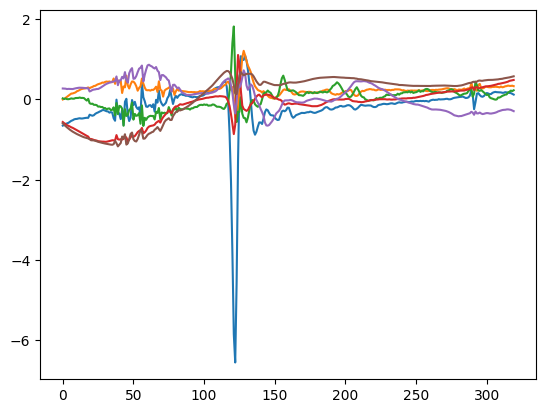

In [14]:
y_batch, x_batch = next(iter(train_loader))
x = x_batch[0].numpy()
plt.plot(x)
plt.show()